**ADALIN**  регрессия

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import MinMaxScaler

---

In [2]:
# from time import time
# def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
# загружаем даные
data = np.loadtxt('../data/1000b/points.txt')
data.shape

(1000, 2)


In [4]:
X = data[:,0:-1] # признаки
y = data[:,-1] # ответ

In [5]:
# # масштабируем признаки в [-1,1]
X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

In [6]:
%xdel data

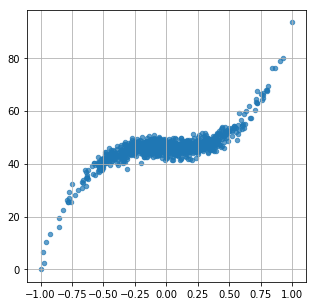

In [7]:
# рисуем исходные данные
plt.gcf().set_size_inches(5,5) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.grid()
plt.show()

In [8]:
Xp = np.hstack([np.ones([X.shape[0],1]),X])
Xp.shape

(1000, 2)

In [9]:
# инициализация параметров
W = np.random.rand(Xp.shape[1])
# W = np.array( [0] + [1]*X.shape[1] )
W

array([0.8753616, 0.3384707])

In [10]:
%%time

# метод градиентного спуска
MAX_ITER = 500 # максимальное число циклов обучения
MIN_ERROR = 10.0 # порог минимальной ошибки


a=1e-1 # скорость обучени
ex_count_div = 1.0/(2.0*Xp.shape[0])

er_hist=[]
    
for i in range(MAX_ITER):
    O = Xp.dot(W) # выход
    E = O - y # ошибка
    er = ex_count_div*E.dot(E.T) # средняя квадратичная ошибка
    er_hist.append(er)
  
    # print('step %i/%i: %.03f'%(i+1,MAX_ITER,er))
       
    if er < MIN_ERROR: # проверяем достижение порога
        print('step %i/%i: error bound %.03f'%(i+1,MAX_ITER,er))
        break
    
    dW = a * ex_count_div * ( E.dot(Xp) ) # изменение весов
    
    W = W - dW # корректируем параметры

step 168/500: error bound 9.988
CPU times: user 6.16 ms, sys: 0 ns, total: 6.16 ms
Wall time: 5.9 ms


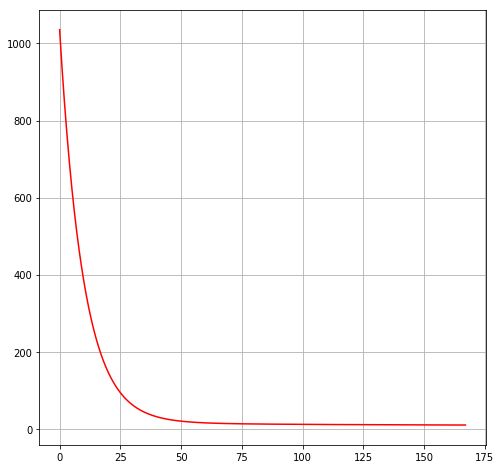

In [11]:
# рисуем изменение ф-ции потери
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.plot(range(len(er_hist)),er_hist,'-r')
plt.grid()
plt.show()

In [12]:
# вектор-столбец крайние значения признака
xx = np.array([ X.min(), X.max(), ]).reshape((2,1)) 
# значение регрессии для xx
yy = np.hstack([np.ones([2,1]),xx]).dot(W)

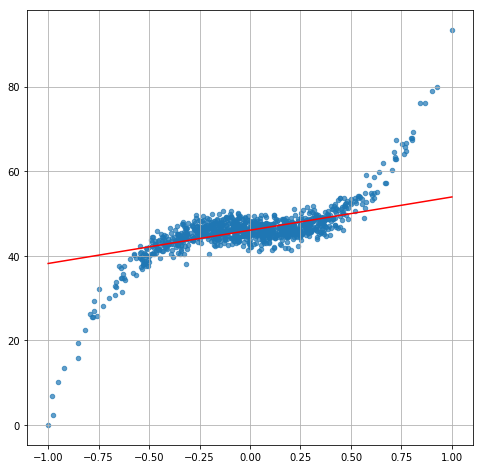

In [13]:
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.plot(xx,yy,'-r') # линия регрессии
plt.grid()
plt.show()